# Demonstration: QCNN algorithm


In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses, visualization as qplt, general as qmlgen, hamiltonians

### Ising Chain
#### Phases:
    1. Paramagnetic:  Label = 0
    2. Ferromagnetic: Label = 1

In [2]:
# States parameters
N        = 8
side     = 100

# Learning parameters
lr       = 0.3
n_epochs = 1000


In [3]:
myvqe  = vqe.load_vqe('../data/vqes/standard/N'+str(N)+'n'+str(side))
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit)

In [4]:
myqcnn.train(lr, 10*n_epochs, train_index = np.arange(side), loss_fn = losses.cross_entropy1D)

Cost: 0.22409388422966003: 100%|██████████| 10000/10000 [01:10<00:00, 141.10it/s]


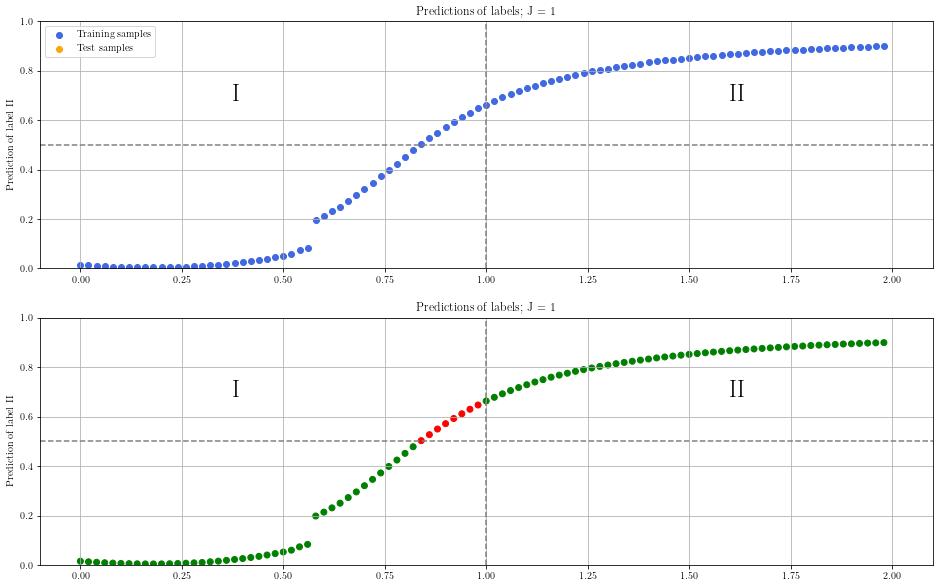

In [5]:
qplt.show_QCNN_classification1D(myqcnn, np.arange(side))

### ANNNI Model
#### Phases:
    1. Paramagnetic:  Label = [1,1]; [1,0,0,0]
    2. Ferromagnetic: Label = [0,1]; [0,0,1,0]
    3. Antiphase:     Label = [1,0]; [0,1,0,0]

In [6]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

from PhaseEstimation import vqe, qcnn, losses, visualization as qplt, general as qmlgen, hamiltonians

In [7]:
# States parameters
N        = 12
side     = 100

# Learning parameters
lr       = 0.3
n_epochs = 1000

In [8]:
myvqe  = vqe.load_vqe('../data/vqes/ANNNI/N'+str(N)+'n'+str(side))
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit, n_outputs=2)

In [9]:
myqcnn.train(lr, n_epochs, train_index = np.arange(2*side), loss_fn = losses.cross_entropy)

Cost: 0.007515103090554476: 100%|██████████| 1000/1000 [02:51<00:00,  5.84it/s]


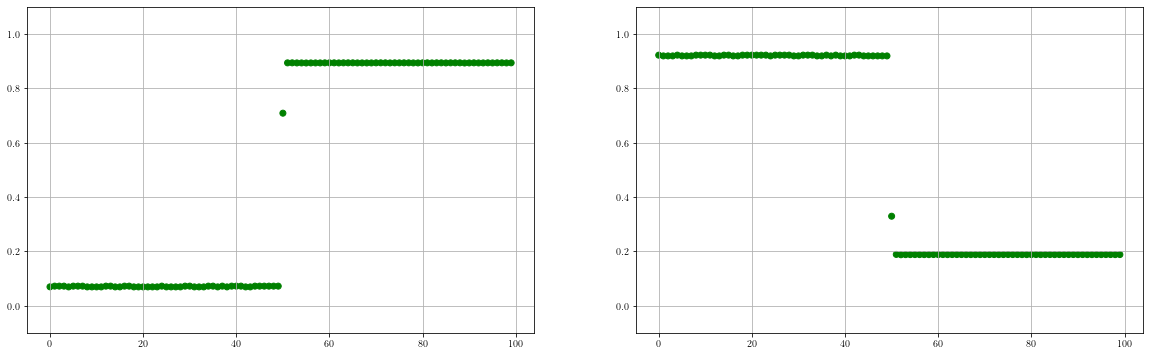

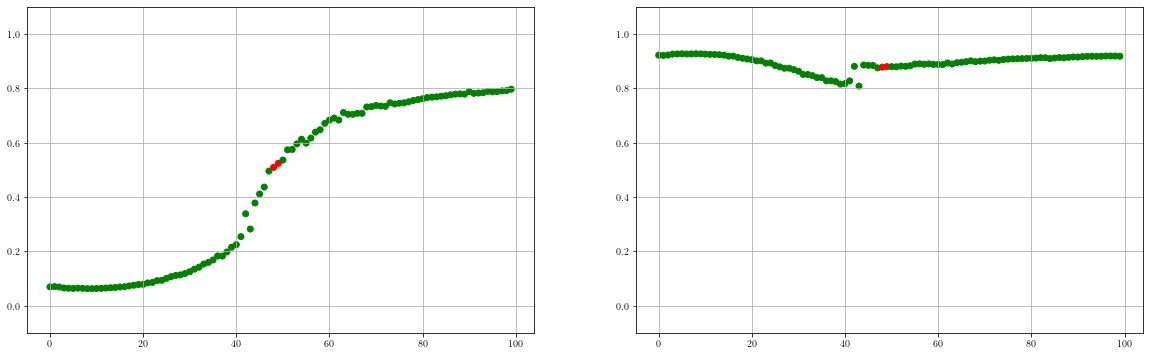

In [10]:
qplt.show_QCNN_classification2D(myqcnn)

/home/saverio/Desktop/CERN/code/qua/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: divide by zero encountered in true_divide
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)
/home/saverio/Desktop/CERN/code/qua/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in multiply
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


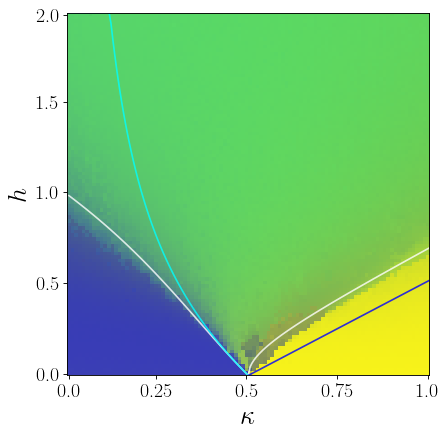

In [11]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False, lines = True, morelines = True)

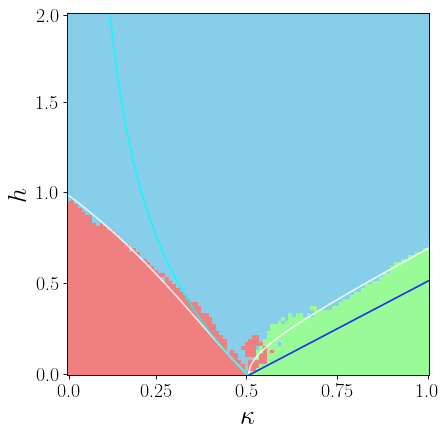

In [12]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = True, lines = True, morelines = True)
